In [12]:
import pandas as pd
import statistics
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [13]:
movies = pd.read_csv('../data/movies_2015_2024.csv')
movies

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341
2,Inside Out,2015,"['Animation', 'Family', 'Adventure', 'Drama', ...",7.910,22924,175000000,857611174,150540
3,Jurassic World,2015,"['Action', 'Adventure', 'Science Fiction', 'Th...",6.699,21102,150000000,1671537444,135397
4,The Martian,2015,"['Drama', 'Adventure', 'Science Fiction']",7.691,20590,108000000,631058917,286217
...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,['Drama'],7.400,1407,1300000,15356046,758866
1003,TÁR,2022,"['Music', 'Drama']",7.090,1426,35000000,29048571,817758
1004,Women Talking,2022,['Drama'],6.861,661,20000000,7589419,777245
1005,Maestro,2023,"['Drama', 'Romance', 'Music']",6.292,791,80000000,300000,523607


## What is the average profit margin (revenue - budget) across genres or years?

In [14]:
#first set a column to represent the difference in revenue and budgets
movies['difference'] = movies['Revenue']-movies['Budget'] 
movies['difference']

0       1040403694
1        228858340
2        682611174
3       1521537444
4        523058917
           ...    
1002      14056046
1003      -5951429
1004     -12410581
1005     -79700000
1006     -20183620
Name: difference, Length: 1007, dtype: int64

In [15]:
#take the means grouped by the years
average_profit_margin_year = movies.groupby('Year')['difference'].mean().reset_index()

In [16]:
#convert to dollar amount
average_profit_margin_year['Average Profit by Year'] = average_profit_margin_year['difference'].apply(lambda x: f"${x:,.2f}")
average_profit_margin_year

,Year,difference,Average Profit by Year
0,2015,1.801913e+08,"$180,191,297.73"
1,2016,1.877424e+08,"$187,742,397.44"
2,2017,1.953722e+08,"$195,372,216.68"
3,2018,1.892042e+08,"$189,204,223.57"
4,2019,1.940946e+08,"$194,094,603.12"
5,2020,1.140208e+07,"$11,402,082.31"
6,2021,5.680010e+07,"$56,800,104.97"
7,2022,9.809300e+07,"$98,092,999.54"
8,2023,1.058705e+08,"$105,870,473.28"
9,2024,1.082629e+08,"$108,262,936.87"


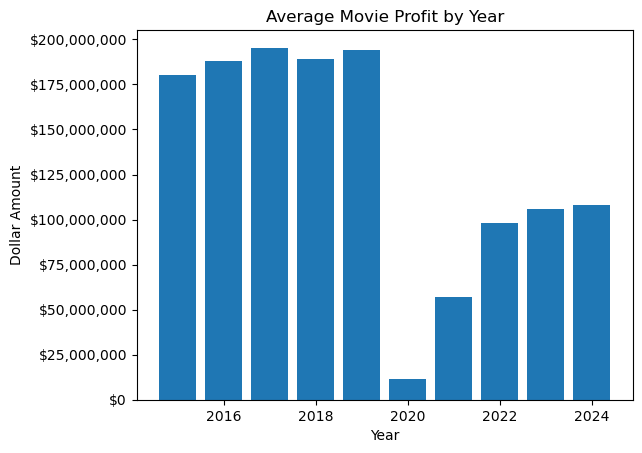

In [23]:
# Create a single plot with the data from average_profit_margin_year
fig, ax = plt.subplots()

# Use the data from average_profit_margin_year for the plot
# Changed from using undefined x, y variables to using the DataFrame columns
ax.bar(average_profit_margin_year['Year'], average_profit_margin_year['difference'])

# Apply the dollar amount formatter to the y-axis
formatter = mticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

plt.ylabel("Dollar Amount")
plt.title('Average Movie Profit by Year')
plt.xlabel('Year')
plt.show()

In [7]:
# Convert Genre column to list type so that it can be exploded
movies['Genre'] = movies['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

In [8]:
#explode the genres list
movies_exploded = movies.explode('Genre', ignore_index = False)

In [9]:
average_profit_margin_genre = movies_exploded.groupby('Genre')['difference'].mean().reset_index()

In [10]:
#convert to dollar amount
average_profit_margin_genre['Average Profit by Genre'] = average_profit_margin_genre['difference'].apply(lambda x: f"${x:,.2f}")
average_profit_margin_genre

,Genre,difference,Average Profit by Genre
0,Action,1.976118e+08,"$197,611,831.52"
1,Adventure,2.651084e+08,"$265,108,436.00"
2,Animation,2.819380e+08,"$281,937,976.30"
3,Comedy,1.373247e+08,"$137,324,691.65"
4,Crime,8.405651e+07,"$84,056,512.98"
5,Documentary,0.000000e+00,$0.00
6,Drama,7.018560e+07,"$70,185,600.62"
7,Family,2.787304e+08,"$278,730,400.87"
8,Fantasy,1.697884e+08,"$169,788,380.67"
9,History,5.680419e+07,"$56,804,193.02"


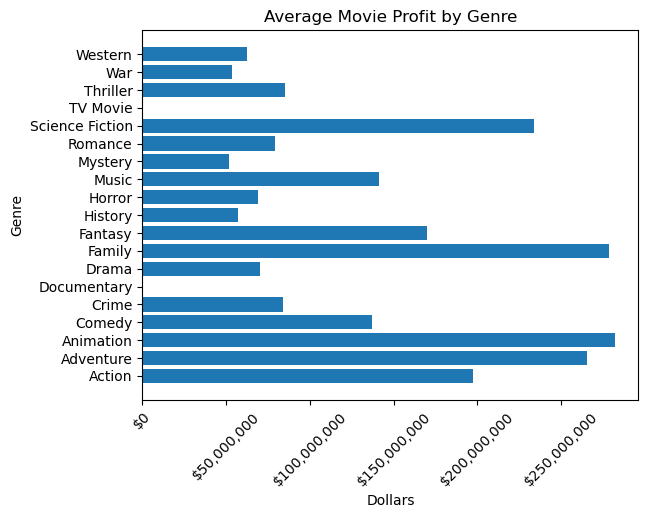

In [28]:
plt.barh(
    y=average_profit_margin_genre['Genre'],
    width=average_profit_margin_genre['difference']
)

formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Average Movie Profit by Genre')
plt.xlabel('Dollars')
plt.xticks(rotation=45)
plt.ylabel('Genre')
plt.show()